# Example of using the fdac module 

In [1]:
import fdac

In [2]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import plotly.express as ex
from finufft import nufft1d3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from scipy.stats import trim_mean, chi2
from math import ceil
import seaborn as sn
import scienceplots
plt.style.use(['science','notebook','grid'])
plt.rcParams['text.usetex'] = True
plt.rcParams.update({"font.size" : 26})
plt.rcParams.update({"axes.labelsize" : 24})
plt.rcParams.update({"xtick.labelsize" : 22})
plt.rcParams.update({"ytick.labelsize" : 22})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

## CoRoT-7 

### Queloz et. al (2009) data 

In [4]:
quel09 = pd.read_table(r'data/CoRoT-7_Queloz09_spec.txt',comment ='#', delim_whitespace=True,\
                      header = None, names= ['JDB','RV','e_RV','FWHM','e_FWHM','Span',\
                                            'e_Span',"log(R'(HK))", "e_log(R'(HK))"])
quel09.head()

/var/folders/yk/b36tymm90p1cnv5qffdwp2z40000gn/T/ipykernel_51252/1506528436.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_table is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  quel09 = pd.read_table(r'data/CoRoT-7_Queloz09_spec.txt',comment ='#', delim_whitespace=True,\


,JDB,RV,e_RV,FWHM,e_FWHM,Span,e_Span,log(R'(HK)),e_log(R'(HK))
0,2.454528e+06,31.1818,0.0015,6.4648,0.0035,0.0258,0.0030,-4.6646,0.0059
1,2.454531e+06,31.1732,0.0015,6.4666,0.0035,0.0309,0.0030,-4.6736,0.0063
2,2.454551e+06,31.1972,0.0021,6.4621,0.0049,0.0191,0.0042,-4.6269,0.0116
3,2.454776e+06,31.1881,0.0022,6.5028,0.0052,0.0340,0.0044,-4.5847,0.0103
4,2.454777e+06,31.1848,0.0028,6.4981,0.0066,0.0317,0.0056,-4.5702,0.0151


In [5]:
#convert values in floats
for i in range(len(quel09.columns)):
    quel09.iloc[:,i] = pd.to_numeric(quel09.iloc[:,i], errors='coerce')

In [6]:
# set the initial obervation time to 0
quel09['shifted_JD'] = quel09['JDB'] - quel09.iloc[0]['JDB']
quel09['RV'] = (quel09['RV'] - np.mean(quel09['RV']))*1000
quel09['e_RV'] = quel09['e_RV']*1000
#erase the first three measurements due to the large gaps between observations
quel09 = quel09[3:]
print('Lenght of the data set:', len(quel09))

Lenght of the data set: 106


Text(0.5, 1.0, 'RV CoRoT-7 Queloz et. al (2009)')

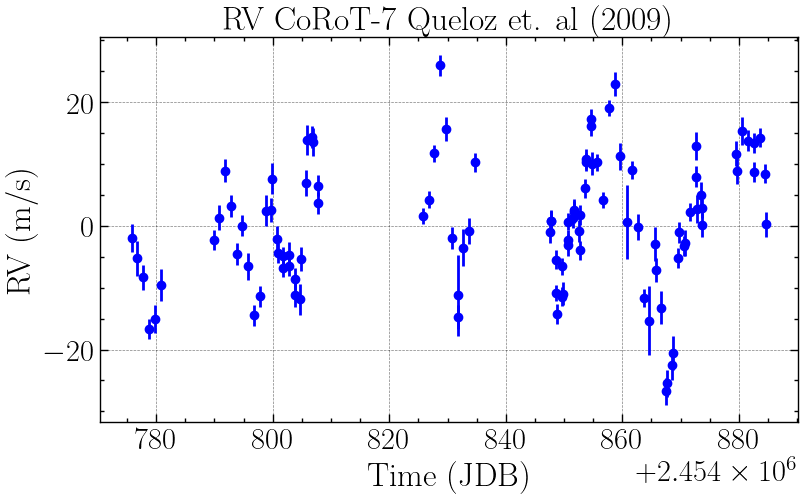

In [7]:
#plot one more time
plt.figure(figsize=(9,5))
plt.errorbar(quel09['JDB'], quel09['RV'], yerr = quel09['e_RV'], fmt = 'o', color = 'b')
plt.ylabel('RV (m/s)')
plt.xlabel('Time (JDB)')
plt.title('RV CoRoT-7 Queloz et. al (2009)', fontsize = 24)

In [8]:
time_quel =  quel09['JDB']
obs_quel = np.array([quel09['RV'], quel09['FWHM'], quel09['Span'], quel09['log(R\'(HK))']])
names_quel = ['RV', 'FWHM', 'Span', 'log(HK)']

In [9]:
fdac_quel = fdac.fdac(np.array(time_quel), obs_quel[0],obs_quel[1:],  names_quel)

Mean Nyquist frequency:  0.4824157617086172 

Median Nyquist frequency:  0.5498723196737622 

10% trimmed Mean Nyquist frequency:  0.7684286541606052 

20% trimmed mean Nyqusit frequenct:  0.7543872008988005


In [10]:
Ray = 1. / (fdac_quel.N*np.mean(fdac_quel.dts))
maxf = 1. / np.mean(fdac_quel.dts) # Go up to 2x mean Nyquist
nR_pos = ceil(maxf / Ray)
print("Number of Rayleigh resolution units:", nR_pos)
nf = 2*nR_pos + 1
fgrid = np.linspace(-maxf, maxf, num=nf, endpoint=True)

Number of Rayleigh resolution units: 106


Number of Rayleigh resolution units: 106
Maximum frequency (cycles/day): 0.9648
Rayleigh resolution: 0.0092


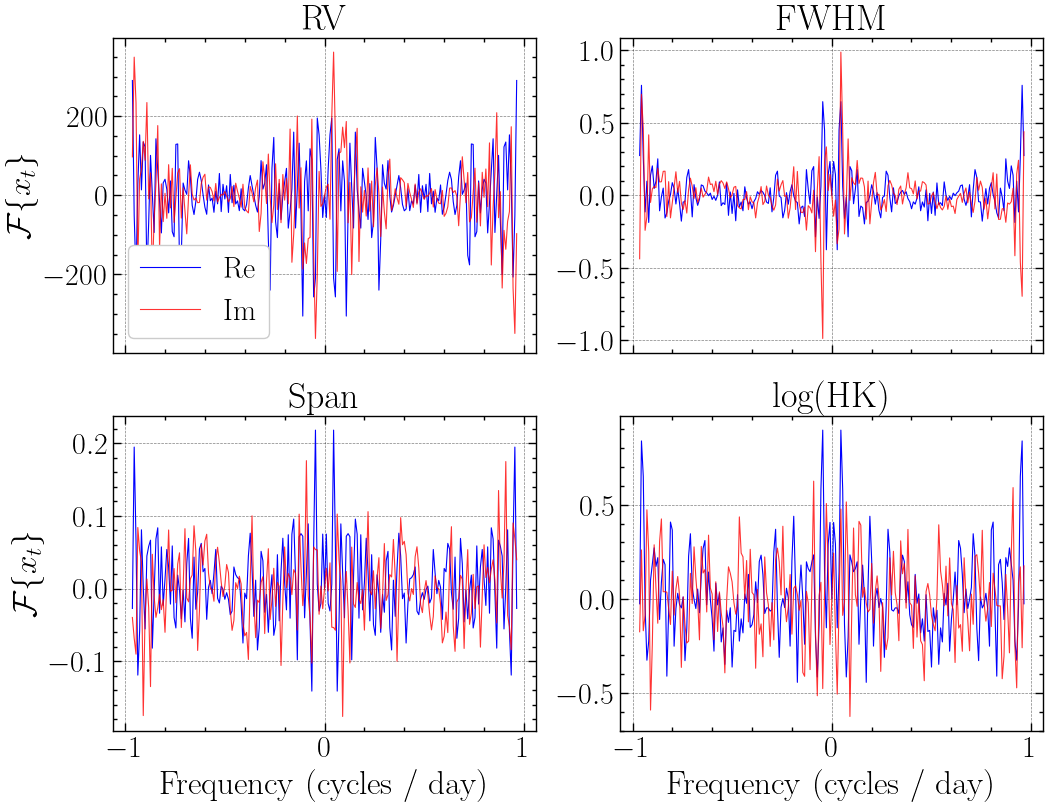

In [15]:
fdac_quel.frequency_grid(fdac_quel.Nyq_meandt)
fdac_quel.fgrid =fgrid
fdac_quel.computeNFFT()
fdac_quel.plotNFFT()

Real
----
Intercept: 
 0.937002957420956
Coefficients: 
 [ 1.71162190e+01  1.23777936e-06 -1.85997247e+01 -1.56579520e-07
 -2.23484046e+01  2.14088589e-07]

Imaginary
---------
Intercept: 
 5.546186416007545e-07
Coefficients: 
 [ 4.46998364e-07  5.02129896e+01 -2.51552177e-07 -2.15233653e+01
 -6.06411927e-07 -3.21181887e+00]


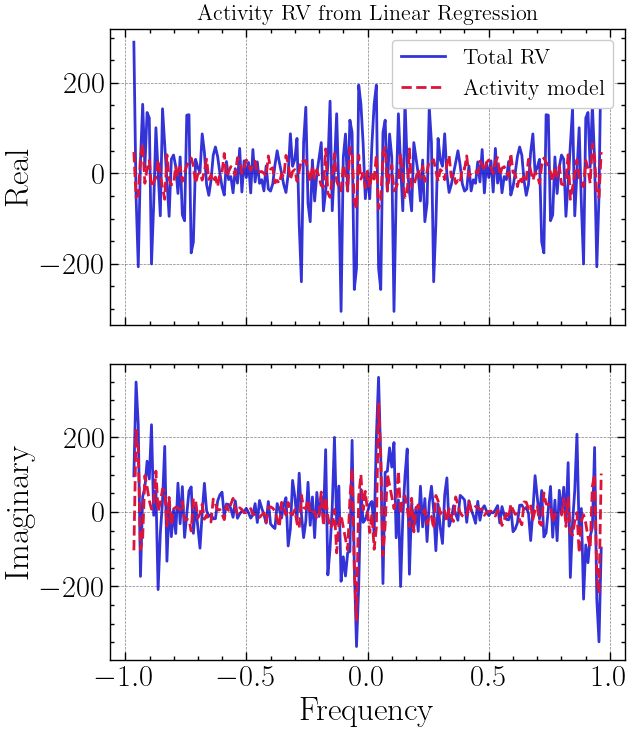

In [17]:
fdac_quel.linear_reg()
fdac_quel.fftac_plot()

Raw standard deviation 10.3005
Variance ratio: 0.2205
Inversion fully computed
Std dev of clean RV: 8.948472859391517


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


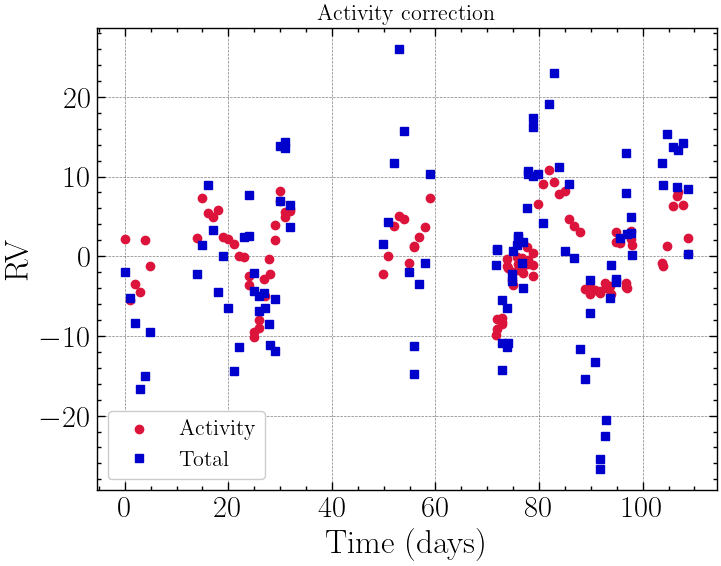

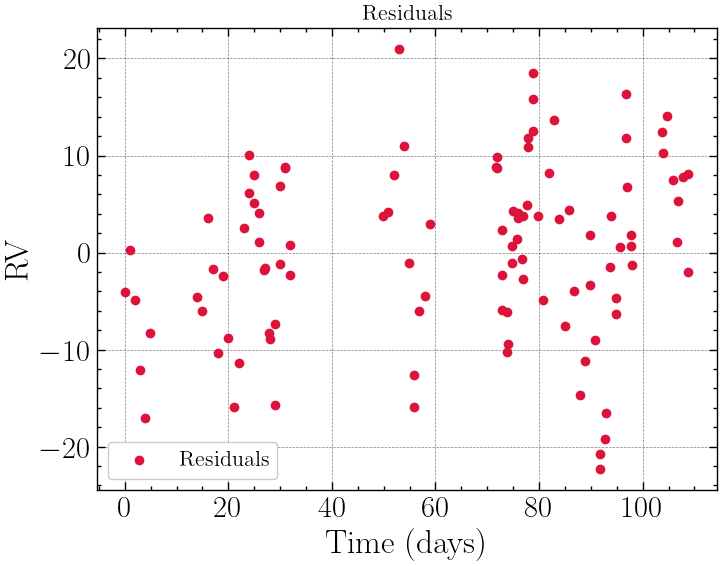

In [18]:
fdac_quel.inverfft()
fdac_quel.activityplot(clean = True)

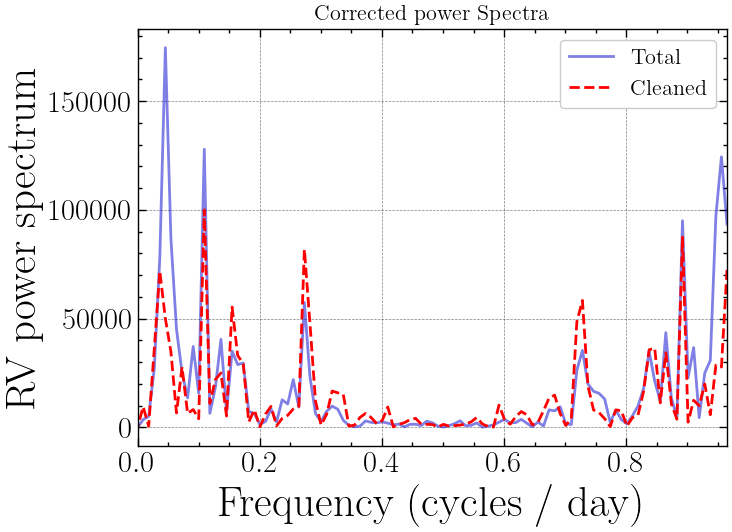

In [44]:
fdac_quel.residual_powplot()

## Check why the FFT are different from the other notebook

In [19]:
names = quel09.columns[1:9:2]
names

Index(['RV', 'FWHM', 'Span', 'log(R'(HK))'], dtype='object')

In [39]:
time_quel=np.array(time_quel)-time_quel[0]

In [40]:
N = len(quel09)
dts = np.diff(time_quel)
maxf = 1. / np.mean(dts) # Go up to 2x mean Nyquist
Ray = 1. / (N*np.mean(dts))
print("Maximum frequency (cycles/day):", f"{maxf:.4f}")
print("Rayleigh resolution:", f"{Ray:.4f}")

Maximum frequency (cycles/day): 0.9648
Rayleigh resolution: 0.0091


In [41]:
nR_pos = ceil(maxf / Ray)
print("Number of Rayleigh resolution units:", nR_pos)
nf = 2*nR_pos + 1
fgrid = np.linspace(-maxf, maxf, num=nf, endpoint=True)

Number of Rayleigh resolution units: 106


In [42]:
RV_FFT = nufft1d3(2*np.pi*time_quel, np.array(quel09[names[0]]).astype(complex)-quel09[names[0]].mean(), \
                  fgrid, isign=-1, nthreads=1)
FWHM_FFT = nufft1d3(2*np.pi*time_quel, np.array(quel09[names[1]]).astype(complex)-quel09[names[1]].mean(), \
                  fgrid, isign=-1, nthreads=1)
Span_FFT = nufft1d3(2*np.pi*time_quel, np.array(quel09[names[2]]).astype(complex)-quel09[names[2]].mean(), \
                  fgrid, isign=-1, nthreads=1)
logHK_FFT = nufft1d3(2*np.pi*time_quel, np.array(quel09[names[3]]).astype(complex)-quel09[names[3]].mean(), \
                  fgrid, isign=-1, nthreads=1)

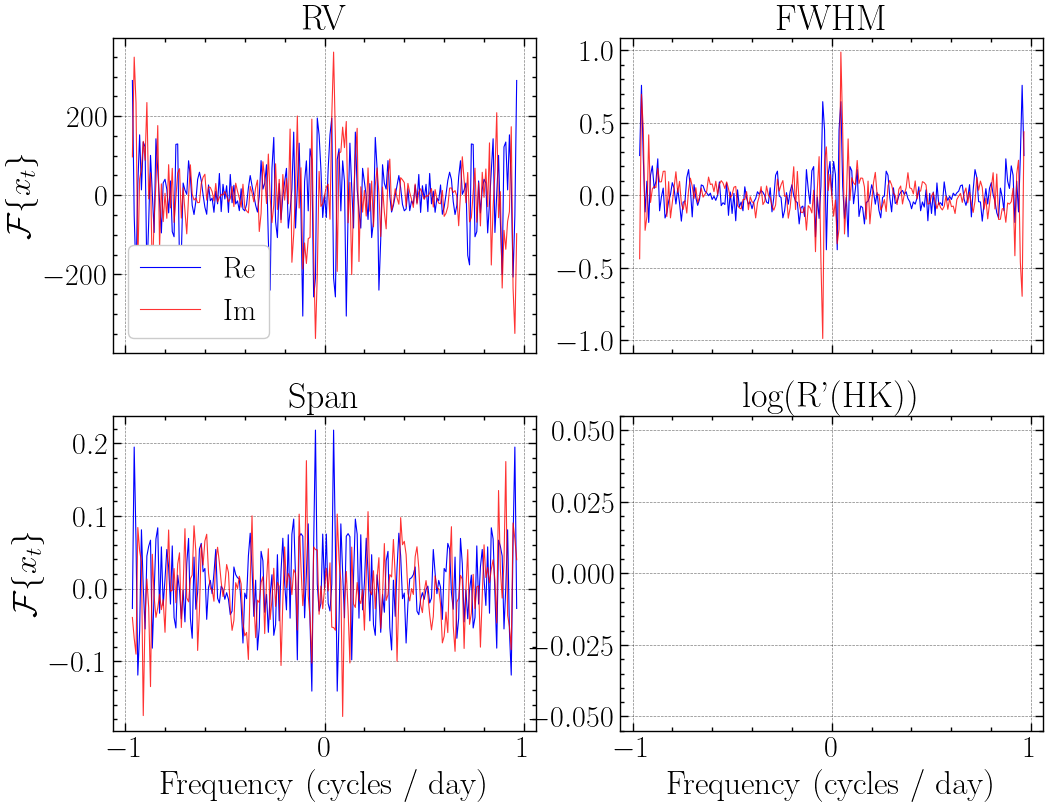

In [43]:
FFTlist = [RV_FFT, FWHM_FFT, Span_FFT, logHK_FFT]

fig, axarr = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,9))
for i, ax in enumerate(axarr.flat):
    ax.plot(fgrid, FFTlist[i].real, label="Re", lw=0.8, color = 'b')
    ax.plot(fgrid, FFTlist[i].imag, label="Im", lw=0.8, alpha=0.8, color = 'r')
    ax.set_title(names[i], fontsize="medium")
    ax.tick_params(labelsize="small")
    if (i % 2 == 0):
        ax.set_ylabel(r"$\mathcal{F}\{x_t\}$")
    if (i == 0):
        ax.legend(loc="best", fontsize="small")
    if (i >= 2):
        ax.set_xlabel("Frequency (cycles / day)")

In [8]:
#make a copy of the dataframe
copia = quel09.copy()
copia = copia.dropna(subset = ["log(R'(HK))"])
copia = copia.reset_index(drop = True)
print(len(copia))

97


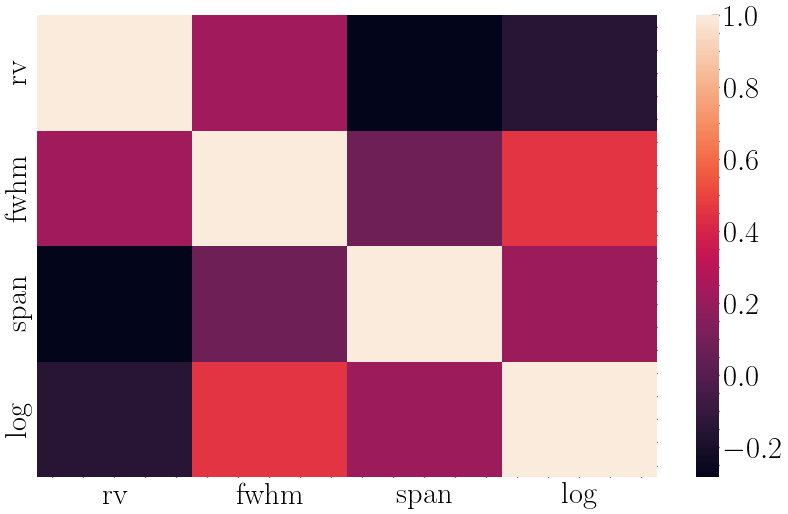

In [9]:
rv = np.array(quel09['RV'])
act = np.array((quel09['FWHM'], quel09['Span'], quel09['log(R\'(HK))']))
names = ['rv', 'fwhm', 'span', 'log']
dataf = pd.DataFrame(act.T , columns = names[1:])
dataf[names[0]] = rv
dataf = dataf.reindex(columns= names)
plt.figure(figsize=(10,6))
ax = sn.heatmap(dataf.corr())

In [10]:
np.vstack([rv, act])[0].size

106

<Axes: >

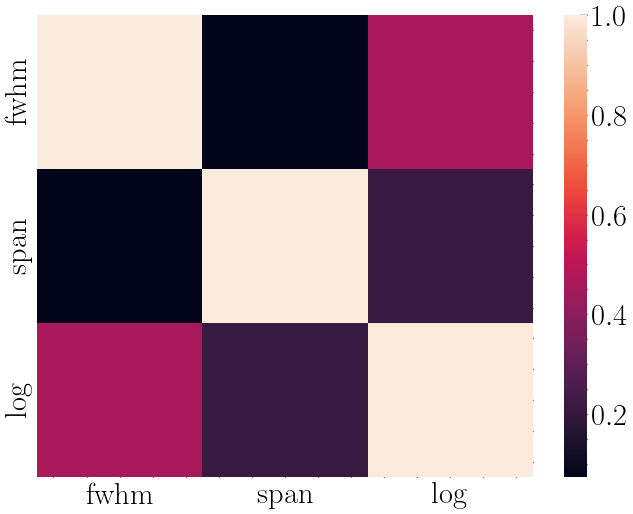

In [11]:
data = pd.DataFrame(act.T)
sn.heatmap(data.corr(), xticklabels = names[1:], yticklabels = names[1:])

In [12]:
ti = copia['JDB'] - copia['JDB'][0]
print(1/ti*(len(ti) - 1))

0            inf
1     102.200396
2      49.419425
3      32.703485
4      24.417788
         ...    
92      0.899664
93      0.898566
94      0.890795
95      0.883107
96      0.882132
Name: JDB, Length: 97, dtype: float64


In [13]:
time_quel =  copia['JDB']
obs_quel = np.array([copia['RV'], copia['FWHM'], copia['Span'], copia['log(R\'(HK))']])
names_quel = ['RV', 'FWHM', 'Span', 'log(HK)']

In [14]:
fdac_quel = fdac.fdac(time_quel, obs_quel[0],obs_quel[1:],  names_quel)

Mean Nyquist frequency:  0.44106583927645 

Median Nyquist frequency:  0.5623493608108857 

10% trimmed Mean Nyquist frequency:  0.7468549682732603 

20% trimmed mean Nyqusit frequenct:  0.8017375255738872


Number of Rayleigh resolution units: 98
Maximum frequency (cycles/day): 0.8821
Rayleigh resolution: 0.0091


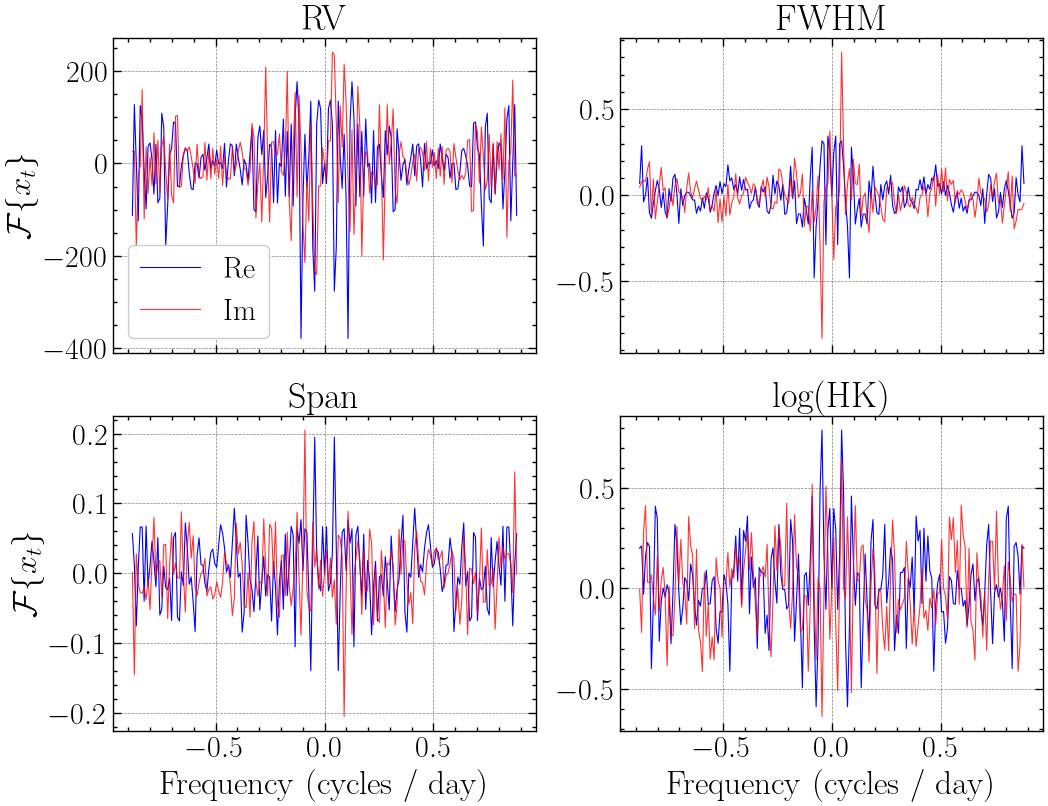

In [15]:
fdac_quel.frequency_grid(fdac_quel.Nyq_meandt)
fdac_quel.computeNFFT()
fdac_quel.plotNFFT()

Real
----
Intercept: 
 -1.3254296016118043
Coefficients: 
 [ 1.71850751e+01 -2.71536290e-07 -1.65705117e+01 -6.55744544e-08
 -1.78258520e+01 -4.29823448e-08]

Imaginary
---------
Intercept: 
 2.2638474350872766e-07
Coefficients: 
 [ 2.06075861e-07  3.18798206e+01 -1.42920071e-07 -9.85459635e+00
 -6.25360198e-07 -4.54556073e+00]


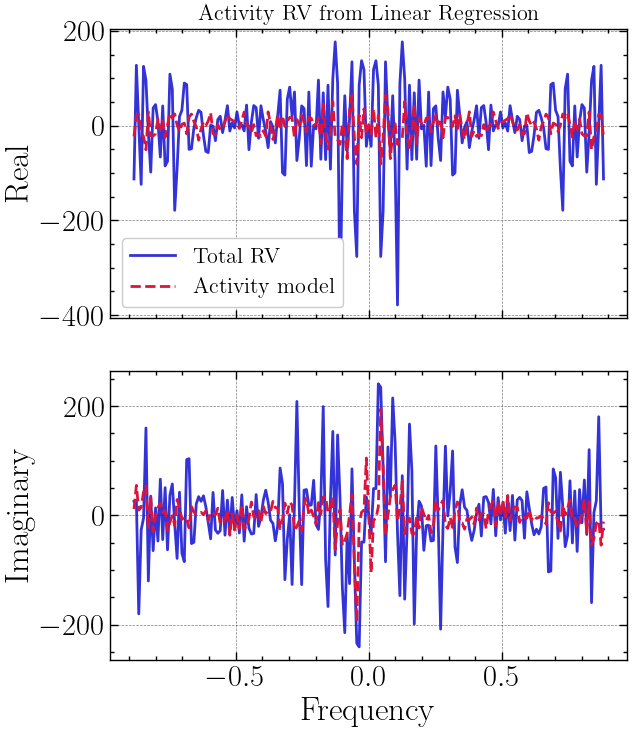

In [16]:
fdac_quel.linear_reg()
fdac_quel.fftac_plot()

Raw standard deviation 10.0868
Variance ratio: 0.1187
Inversion fully computed
hello
Std dev of clean RV: 9.385048264206306


/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/collections.py:194: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


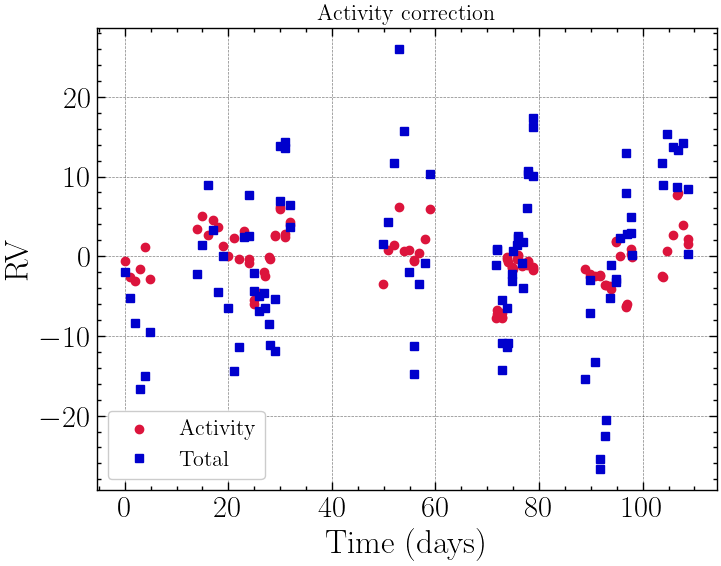

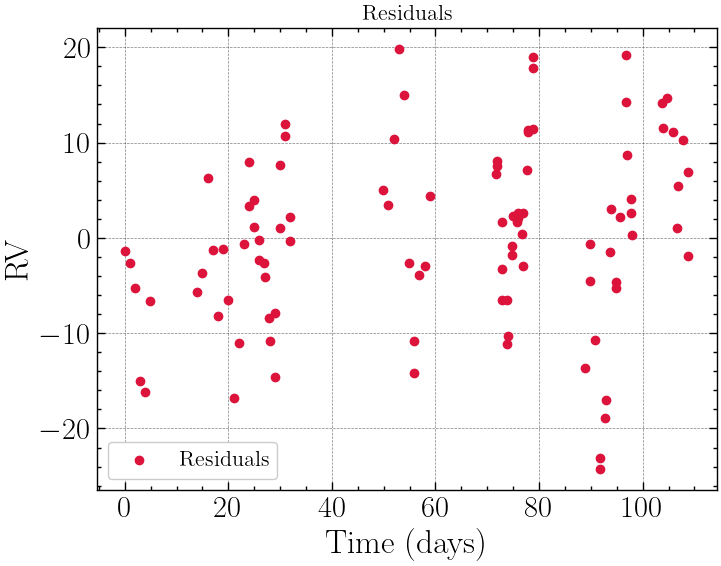

In [17]:
fdac_quel.inverfft()
fdac_quel.activityplot(clean = True)

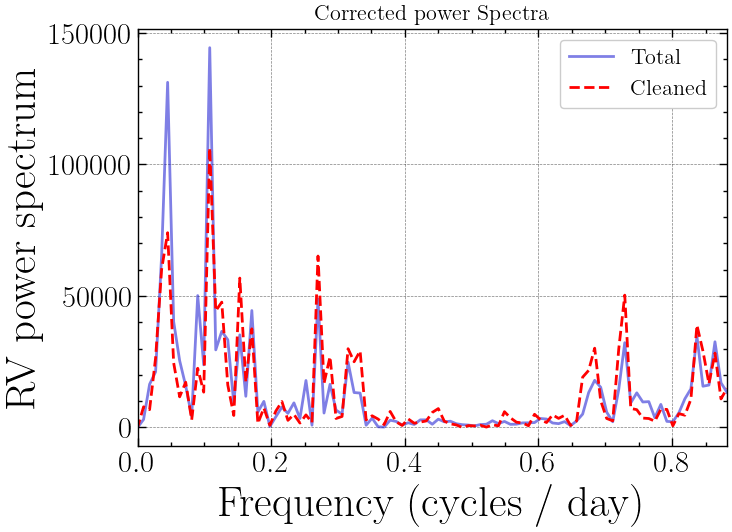

In [18]:
fdac_quel.residual_powplot()

### try again with a different frequency grid

In [24]:
len(fdac_quel.t)

97

In [22]:
fdac_quel.N

97

In [21]:
Ray = 1. / (fdac_quel.N*np.mean(fdac_quel.dts))
maxf = 1. / np.mean(fdac_quel.dts) # Go up to 2x mean Nyquist
nR_pos = ceil(maxf / Ray)
print("Number of Rayleigh resolution units:", nR_pos)
nf = 2*nR_pos + 1
fgrid = np.linspace(-maxf, maxf, num=nf, endpoint=True)

Number of Rayleigh resolution units: 97


### Haywood et. al (2014) data 

In [14]:
haydata = pd.read_csv('data/CoRoT-7_Haywood14_spec.txt', sep = '\t', skiprows = 7)
haydata.columns = ['JDB', 'RV', 'e_RV', 'FWHM', 'BIS', "log(R'(HK))", "e_log(R'(HK))"]
haydata.head()

D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


,JDB,RV,e_RV,FWHM,BIS,log(R'(HK)),e_log(R'(HK))
0,2.455940e+06,31.18031,0.00233,6.45633,0.01199,4.6990,0.0180
1,2.455940e+06,31.17814,0.00212,6.46445,0.01966,4.7188,0.0173
2,2.455941e+06,31.18283,0.00251,6.46592,0.01956,4.6982,0.0210
3,2.455941e+06,31.17833,0.00271,6.45650,0.03679,4.7789,0.0283
4,2.455941e+06,31.18415,0.00215,6.46568,0.01359,4.7204,0.0180


In [15]:
#change units
haydata['shifted_JD'] = haydata['JDB'] - haydata.iloc[0]['JDB']
haydata['RV'] = (haydata['RV'] - np.mean(haydata['RV']))*1000
haydata['e_RV'] = haydata['e_RV']*1000

Text(0.5, 1.0, 'RV CoRoT-7 Haywood et. al (2014)')

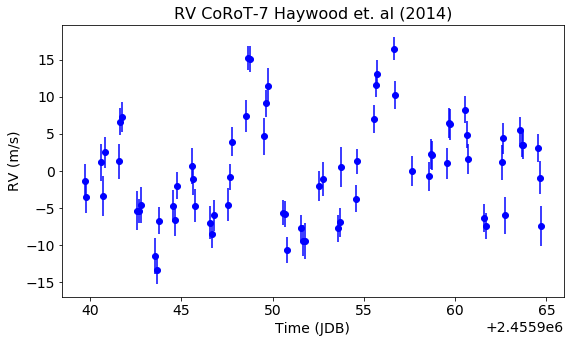

In [16]:
plt.figure(figsize = (9,5))
plt.errorbar(haydata['JDB'], haydata['RV'], yerr = haydata['e_RV'], fmt = 'o', color = 'b')
plt.ylabel('RV (m/s)')
plt.xlabel('Time (JDB)')
plt.title('RV CoRoT-7 Haywood et. al (2014)', fontsize = 16)

In [22]:
time_hay = haydata['JDB']
names_hay = ['RV', 'FWHM', 'BIS', 'log(HK)']
obs_hay = np.array([haydata['RV'], haydata['FWHM'], haydata['BIS'], haydata['log(R\'(HK))']])
fdac_hay = fdac(time_hay, obs_hay, names_hay)

Mean Nyquist frequency:  1.3997693180067394 

Median Nyquist frequency:  4.710981307335369 

10% trimmed Mean Nyquist frequency:  1.4499123256279614 

20% trimmed mean Nyqusit frequenct:  1.527093085520256 



Number of Rayleigh resolution units: 71
Maximum frequency (cycles/day): 2.7995
Rayleigh resolution: 0.0394


D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


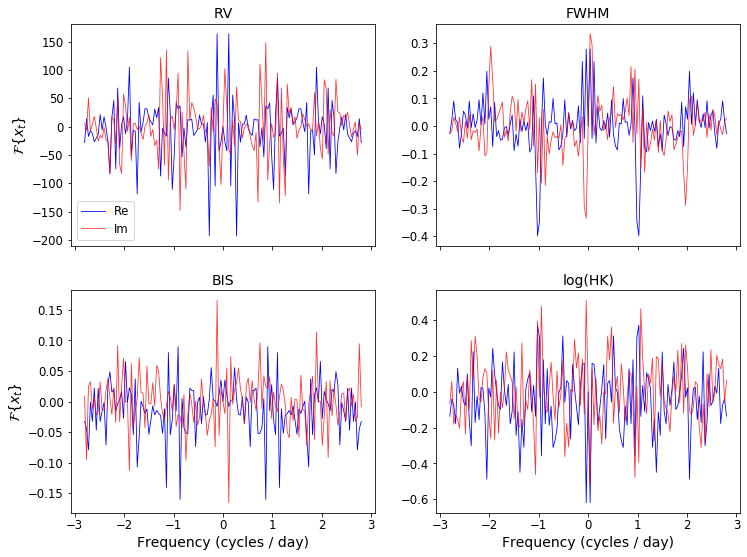

In [23]:
fdac_hay.frequency_grid(fdac_hay.Nyq_meandt)
fdac_hay.computeNFFT()
fdac_hay.plotNFFT()

Real
----
Intercept: 
 -4.185494368280192
Coefficients: 
 [ 2.54678921e+01 -1.13493552e-08 -2.59848085e+00  3.43918119e-08
  2.92232678e+00 -5.09088432e-09]

Imaginary
---------
Intercept: 
 1.964302747303529e-08
Coefficients: 
 [-3.52543151e-08  2.52634983e+01  5.50607737e-09 -2.75149580e+00
 -2.23207657e-08  1.04837396e+00]


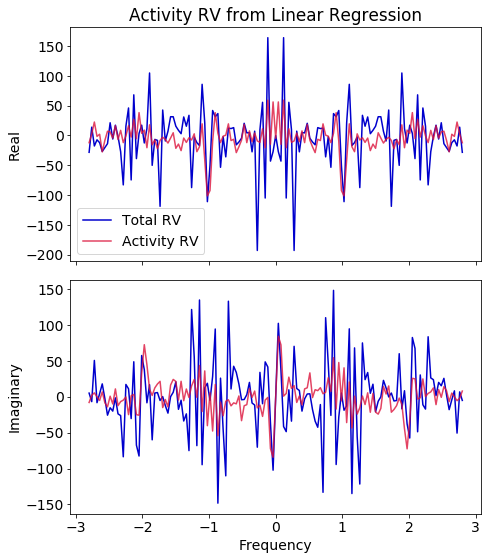

In [24]:
fdac_hay.linear_reg()
fdac_hay.fftac_plot()

23.727511478117165 8.535617942372146e-08
Raw standard deviation 6.8582
Variance ratio: 0.2287
Should be 1: 1.0
Should be equal: 3.2798 3.2798
Std dev of clean RV: 6.119460940976926


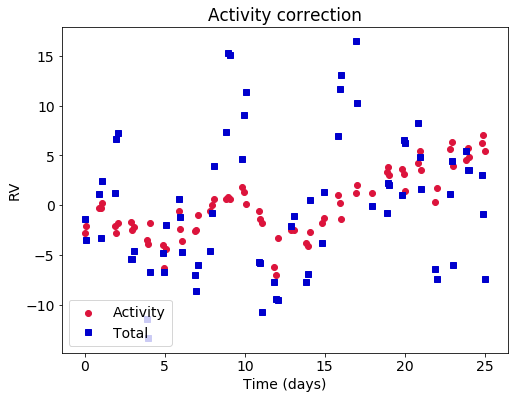

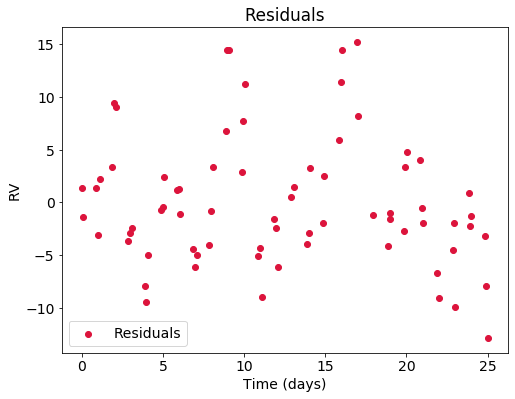

In [25]:
fdac_hay.inverfft()
fdac_hay.activityplot(clean = True)

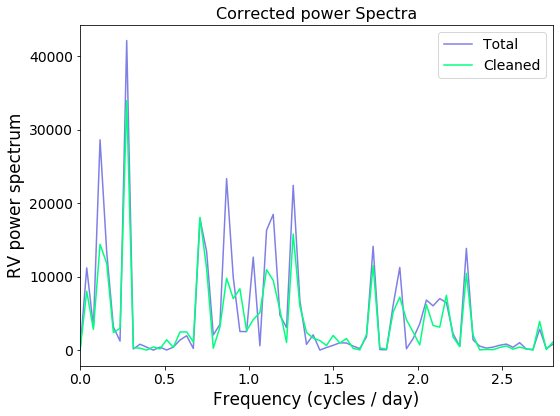

In [26]:
fdac_hay.residual_powplot()

### Both datasets together 

In [27]:
t_full = np.append(copia['JDB'], haydata['JDB'])
rv_full = np.append(copia['RV'], haydata['RV'])
fwhm_full = np.append(copia['FWHM'], haydata['FWHM'])
loghk_full = np.append(np.abs(copia['log(R\'(HK))']), haydata['log(R\'(HK))'])
bis_full = np.append(copia['Span'], haydata['BIS'])
obs_full = np.array([rv_full, fwhm_full, bis_full, loghk_full])

In [28]:
names = ['RV', 'FWHM', 'BIS', 'log(HK)']
fdac_full = fdac(t_full, obs_full, names)

Mean Nyquist frequency:  0.07023390525692509 

Median Nyquist frequency:  0.6490640494051332 

10% trimmed Mean Nyquist frequency:  0.9959833639949668 

20% trimmed mean Nyqusit frequenct:  1.005460858994769 



Number of Rayleigh resolution units: 168
Maximum frequency (cycles/day): 1.2981
Rayleigh resolution: 0.0077


D:\Anaconda\lib\site-packages\pandas\core\indexes\base.py:459: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif issubclass(data.dtype.type, np.bool) or is_bool_dtype(data):


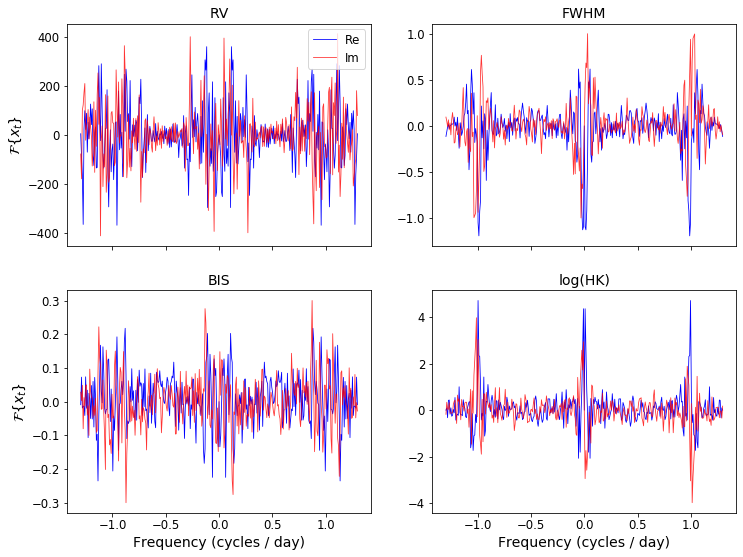

In [29]:
fdac_full.frequency_grid(fdac_full.Nyq_meddt)
fdac_full.computeNFFT()
fdac_full.plotNFFT()

Real
----
Intercept: 
 -1.7680997265820317
Coefficients: 
 [ 7.94383483e+01  1.07284664e-06 -2.43469943e+01  9.36991385e-07
  4.63979478e+01  2.24479624e-06]

Imaginary
---------
Intercept: 
 -8.696663048653331e-07
Coefficients: 
 [-2.82141730e-07  7.90827530e+01 -1.43018683e-06 -2.22417085e+01
 -1.84940916e-07  4.84685445e+01]


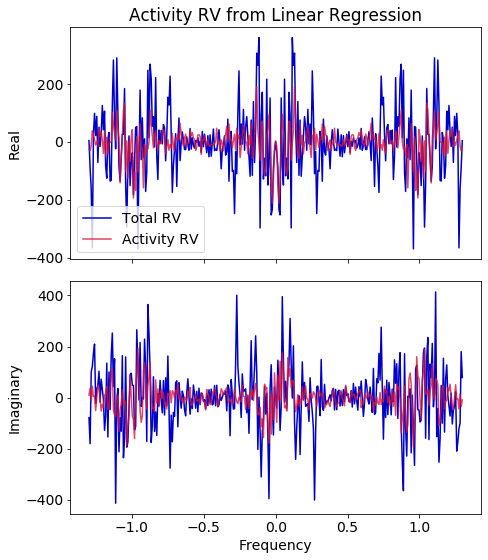

In [30]:
fdac_full.linear_reg()
fdac_full.fftac_plot()

45.730534708808136 1.4976664443690934e-06
Raw standard deviation 8.8703
Variance ratio: 0.2125
Should be 1: 1.0
Should be equal: 4.0886 4.0886
Std dev of clean RV: 8.120567175920668


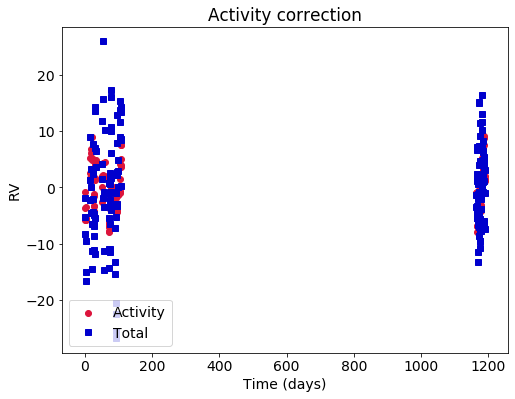

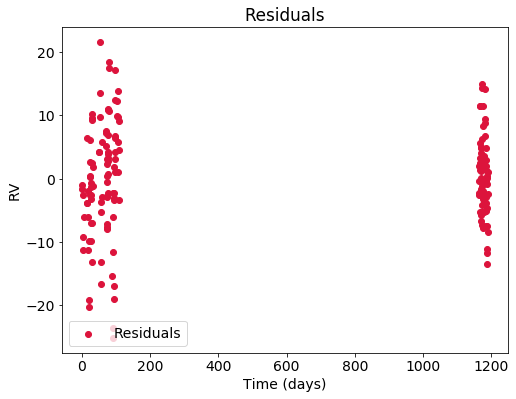

In [31]:
fdac_full.inverfft()
fdac_full.activityplot(clean = True)

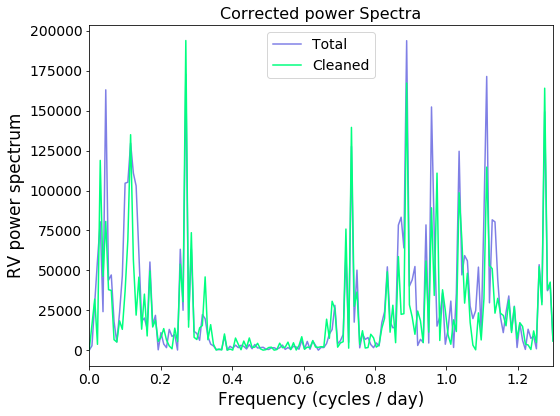

In [32]:
fdac_full.residual_powplot()